In [1]:
import numpy as np
import pandas as pd
from CSVUtils import *
import pickle
from os import path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir_dict = {
    "0.10": "thres10",
    "0.15": "thres15",
    "0.20": "thres20"
}

freq_list = ["monthly", "biweekly", "weekly"]

In [15]:
save_dir = "/Volumes/Transcend/Project/FYP/code/from github/Stock-Trading-Environment/output/allperiod"
for thres in dir_dict:
    for freq in freq_list:
        model_df = pickle.load(open(path.join(save_dir, thres+"_"+freq+"_df.out"), "rb"))
        print(thres, freq, "actual", np.mean(model_df['actual_profit']), "nominal",np.mean(model_df['nominal_profit']))

0.10 monthly actual 0.003745207213673076 nominal 1.1029773512972132
0.10 biweekly actual 0.007201004200668404 nominal 1.1169147469744611
0.10 weekly actual 0.006054587293523931 nominal 1.1140956698417577
0.15 monthly actual 0.009601846981235512 nominal 1.1066985413800747
0.15 biweekly actual 0.0045851734547704874 nominal 1.1112417270623804
0.15 weekly actual 0.004427325755132995 nominal 1.1089939550221275
0.20 monthly actual 0.05603993354166346 nominal 1.2170430316728602
0.20 biweekly actual 0.17201705765168562 nominal 1.4846553714230657
0.20 weekly actual 0.13432252096139025 nominal 1.399928412394362


In [27]:
model_df

,start,end,actual_profit,nominal_profit,log_actual_profit,log_nominal_profit
0,2000,2004,-0.081543,-0.269634,-0.085060,-0.314210
1,2000,2005,-0.140467,-0.104447,-0.151366,-0.110314
2,2000,2006,-0.149158,0.100376,-0.161529,0.095652
3,2000,2007,-0.187080,0.681845,-0.207122,0.519892
4,2000,2008,-0.002416,0.405761,-0.002419,0.340579
5,2000,2009,-0.211801,0.716195,-0.238004,0.540109
6,2000,2010,-0.027441,1.223417,-0.027825,0.799045
7,2000,2011,-0.042287,0.893335,-0.043207,0.638340
8,2000,2012,0.006411,0.769235,0.006391,0.570547
9,2000,2013,-0.023219,0.594091,-0.023493,0.466304


In [17]:
record = pickle.load(open("/Volumes/Seagate Backup Plus Drive/FYP/thres10/monthly/0418-TEST_0.10_monthlyCrisis_2000_2005--summary-200000.out", "rb"))

In [18]:
# final_result_dict = {}
# for thres in dir_dict:
#     for freq in freq_list:
def plotHeatMap(thres, freq, nom_vmax, nom_vmin, act_vmax, act_vmin):
    DIR = path.join("/Volumes/Seagate Backup Plus Drive/FYP/", dir_dict[thres], freq)
    if os.path.exists(DIR):
        actual_profit_result = {}
        nominal_profit_result = {}
        for start in range(2000, 2016):
            for end in range(start+4, 2020):
                file_prefix = "0418-TEST_"+thres+"_"+freq+"Crisis_"+str(start)+"_"+str(end)+"--detailed-ModelNo_200000-"
                actual_profit_list = []
                nominal_profit_list = []
                for i in range(10):
                    record = pickle.load(open(path.join(DIR,file_prefix+str(i)+".out"), "rb"))
                    df = pd.DataFrame(record)
                    actual_profit_rate = df['actual_profit'].iloc[-1]/df['buyNhold_balance'].iloc[-1]
                    nominal_profit_rate = (df['net_worth'].iloc[-1]-300000)/300000
                    actual_profit_list.append(actual_profit_rate)
                    nominal_profit_list.append(nominal_profit_rate)

                actual_profit_result[(start,end)] = np.mean(actual_profit_list)
                nominal_profit_result[(start,end)] = np.mean(nominal_profit_list)
            print(thres, freq, start)
    
    df_dict = []
    for key in actual_profit_result:
        start = key[0]
        end = key[1]
        df_dict.append({
            "start": start,
            "end":end,
            "actual_profit": actual_profit_result[key],
            "nominal_profit": nominal_profit_result[key],
            "log_actual_profit": np.log(actual_profit_result[key]+1),
            "log_nominal_profit": np.log(nominal_profit_result[key]+1),
        })
    model_df = pd.DataFrame(df_dict)
    
    save_dir = "/Volumes/Transcend/Project/FYP/code/from github/Stock-Trading-Environment/output/allperiod"
    pickle.dump(model_df, open(path.join(save_dir, thres+"_"+freq+"_df.out"), "wb"))
    
    plt.figure(figsize=(10,8))
    plt.title("Log Nominal Return,\nthres="+thres+", freq="+freq) # Compare to the BNH
    sns.heatmap(model_df.pivot(index="start", columns="end", values="log_nominal_profit"), 
                annot=True, fmt=".2f", cmap="RdYlGn", vmax=nom_vmax, vmin=nom_vmin)
    
    plt.figure(figsize=(10,8))
    plt.title("Actual Return Rate,\nthres="+thres+", freq="+freq) # See whether got profit
    sns.heatmap(model_df.pivot(index="start", columns="end", values="actual_profit"), 
                annot=True, fmt=".2f", cmap="RdYlGn", center=0, vmax=act_vmax, vmin=act_vmin)

In [16]:
# final_result_dict = {}
# for thres in dir_dict:
#     for freq in freq_list:
def plotHeatMap(thres, freq, nom_vmax, nom_vmin, act_vmax, act_vmin):
    
    load_dir = "/Volumes/Transcend/Project/FYP/code/from github/Stock-Trading-Environment/output/allperiod"
    model_df = pickle.load(open(path.join(load_dir, thres+"_"+freq+"_df.out"), "rb"))
    
    plt.figure(figsize=(10,8))
    plt.title("Log Nominal Return,\nthres="+thres+", freq="+freq) # Compare to the BNH
    sns.heatmap(model_df.pivot(index="start", columns="end", values="log_nominal_profit"), 
                annot=True, fmt=".2f", cmap="RdYlGn", vmax=nom_vmax, vmin=nom_vmin)
    
    plt.figure(figsize=(10,8))
    plt.title("Actual Return Rate,\nthres="+thres+", freq="+freq) # See whether got profit
    sns.heatmap(model_df.pivot(index="start", columns="end", values="actual_profit"), 
                annot=True, fmt=".2f", cmap="RdYlGn", center=0, vmax=act_vmax, vmin=act_vmin)

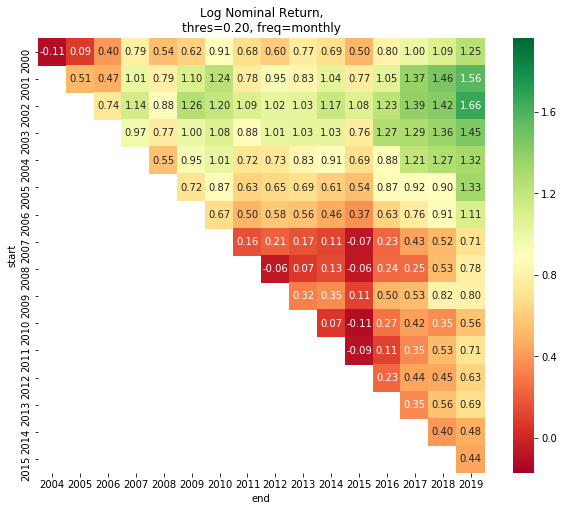

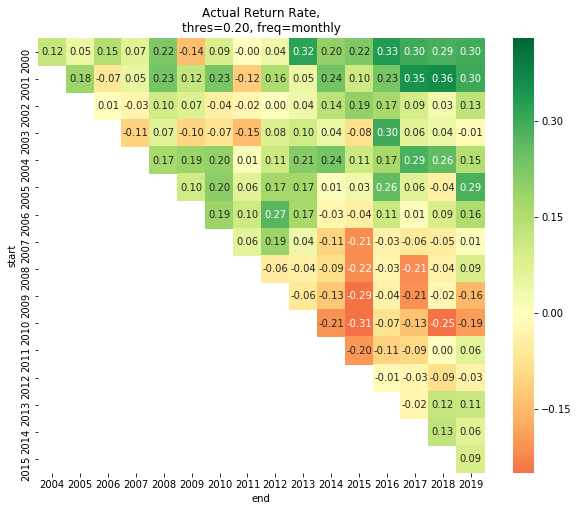

In [17]:
thres="0.20"
freq="monthly"
nom_vmax = 1.9620901330428744 
nom_vmin = -0.17182904358626236
act_vmax = 0.43
act_vmin = -0.25
plotHeatMap(thres, freq, nom_vmax=nom_vmax, nom_vmin=nom_vmin, act_vmax=act_vmax, act_vmin=act_vmin)

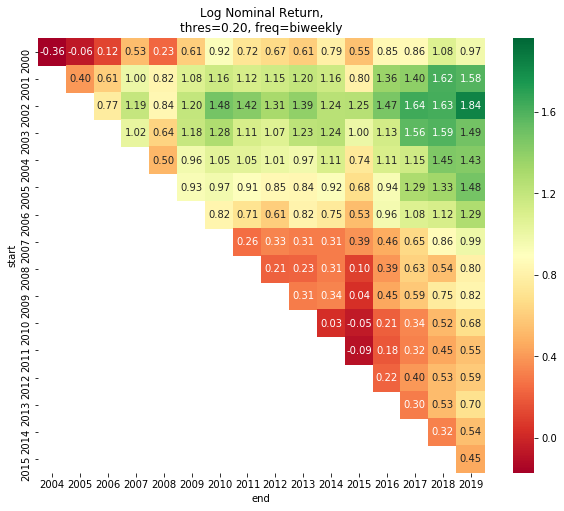

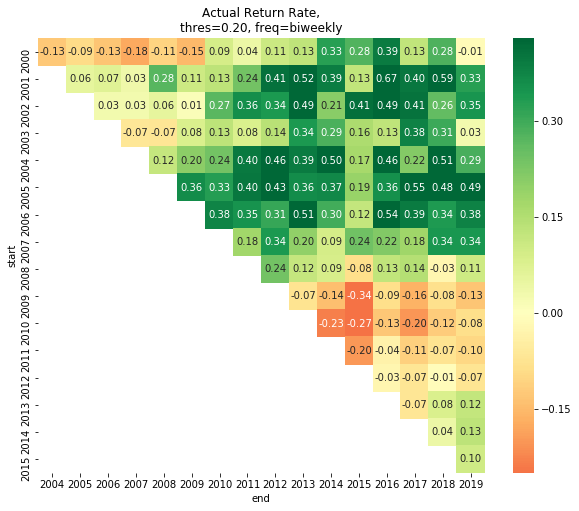

In [18]:
thres="0.20"
freq="biweekly"
nom_vmax = 1.9620901330428744 
nom_vmin = -0.17182904358626236
act_vmax = 0.43
act_vmin = -0.25
plotHeatMap(thres, freq, nom_vmax=nom_vmax, nom_vmin=nom_vmin, act_vmax=act_vmax, act_vmin=act_vmin)

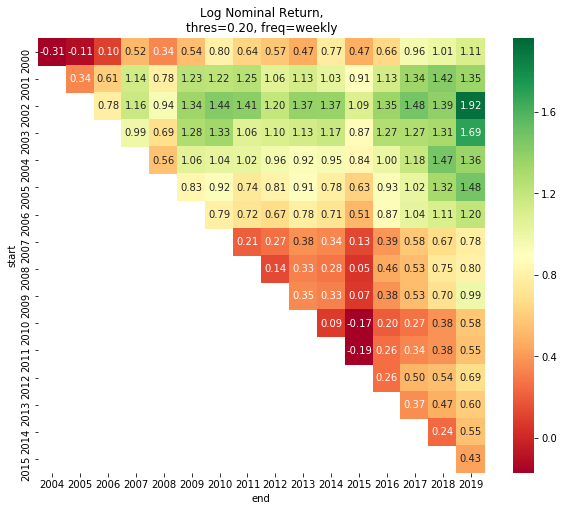

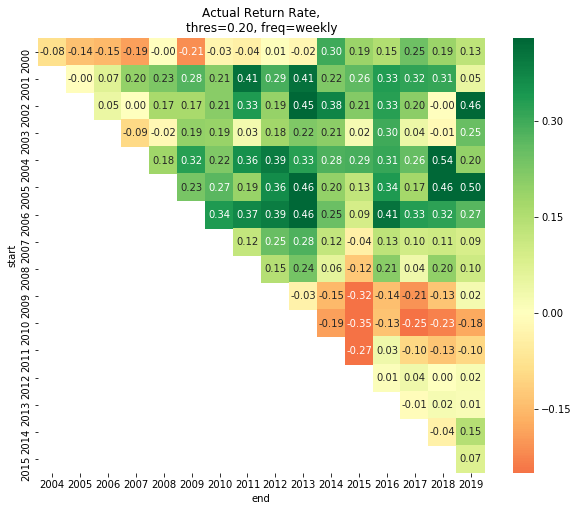

In [19]:
thres="0.20"
freq="weekly"
nom_vmax = 1.9620901330428744 
nom_vmin = -0.17182904358626236
act_vmax = 0.43
act_vmin = -0.25
plotHeatMap(thres, freq, nom_vmax=nom_vmax, nom_vmin=nom_vmin, act_vmax=act_vmax, act_vmin=act_vmin)

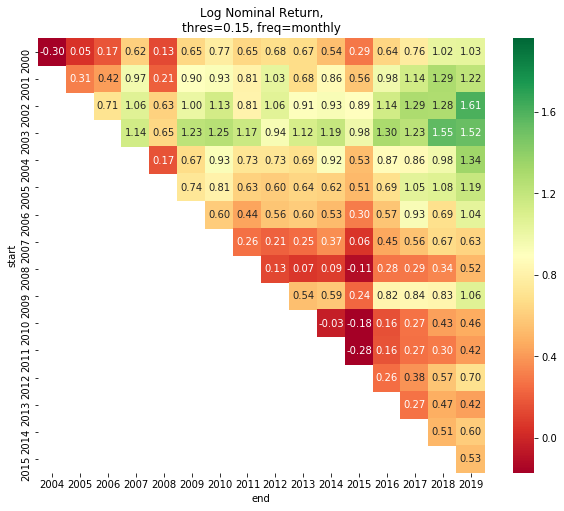

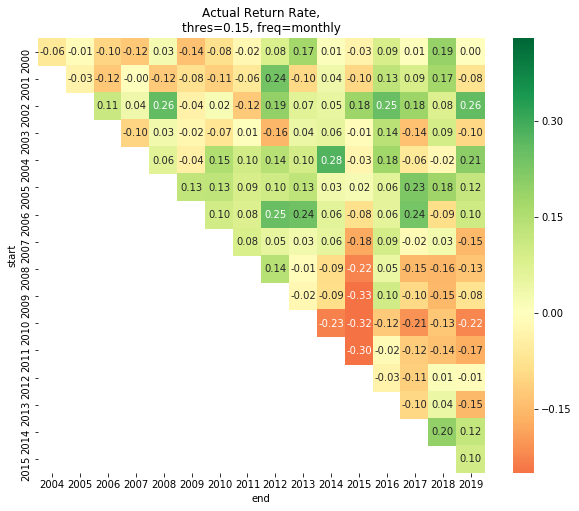

In [20]:
thres="0.15"
freq="monthly"
nom_vmax = 1.9620901330428744 
nom_vmin = -0.17182904358626236
act_vmax = 0.43
act_vmin = -0.25
plotHeatMap(thres, freq, nom_vmax=nom_vmax, nom_vmin=nom_vmin, act_vmax=act_vmax, act_vmin=act_vmin)

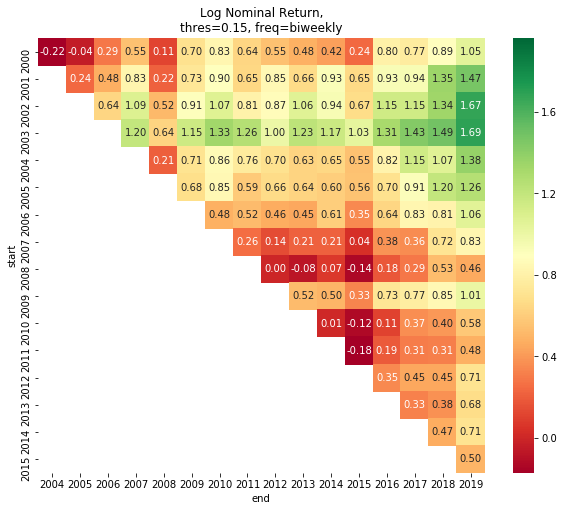

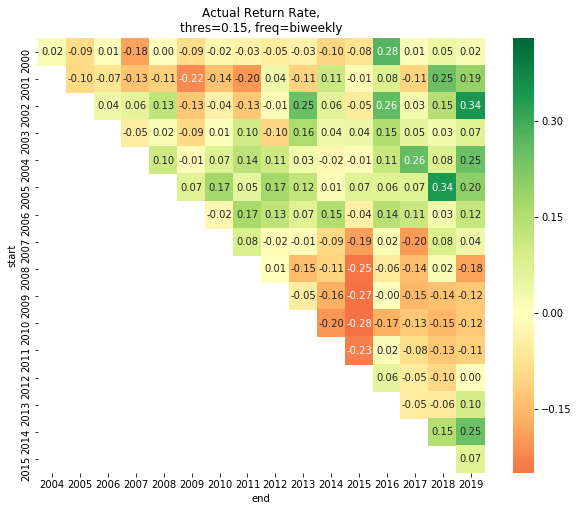

In [21]:
thres="0.15"
freq="biweekly"
nom_vmax = 1.9620901330428744 
nom_vmin = -0.17182904358626236
act_vmax = 0.43
act_vmin = -0.25
plotHeatMap(thres, freq, nom_vmax=nom_vmax, nom_vmin=nom_vmin, act_vmax=act_vmax, act_vmin=act_vmin)

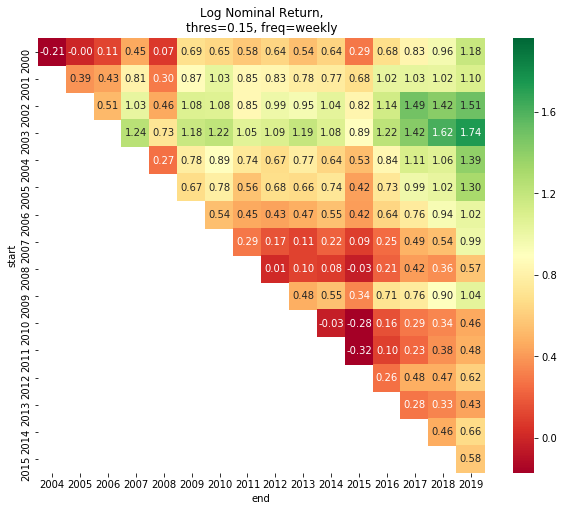

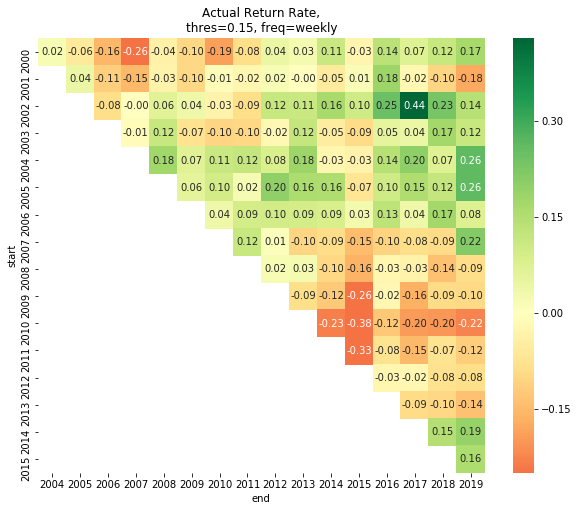

In [22]:
thres="0.15"
freq="weekly"
nom_vmax = 1.9620901330428744 
nom_vmin = -0.17182904358626236
act_vmax = 0.43
act_vmin = -0.25
plotHeatMap(thres, freq, nom_vmax=nom_vmax, nom_vmin=nom_vmin, act_vmax=act_vmax, act_vmin=act_vmin)

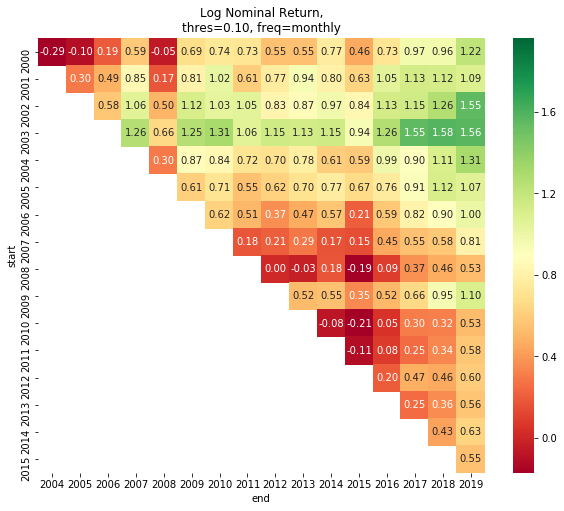

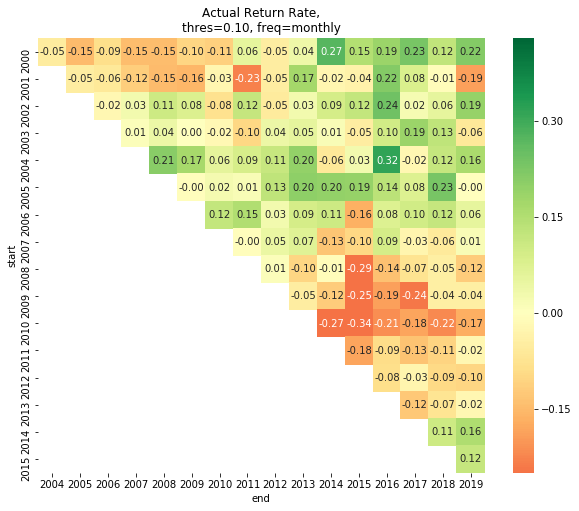

In [23]:
thres="0.10"
freq="monthly"
nom_vmax = 1.9620901330428744 
nom_vmin = -0.17182904358626236
act_vmax = 0.43
act_vmin = -0.25
plotHeatMap(thres, freq, nom_vmax=nom_vmax, nom_vmin=nom_vmin, act_vmax=act_vmax, act_vmin=act_vmin)

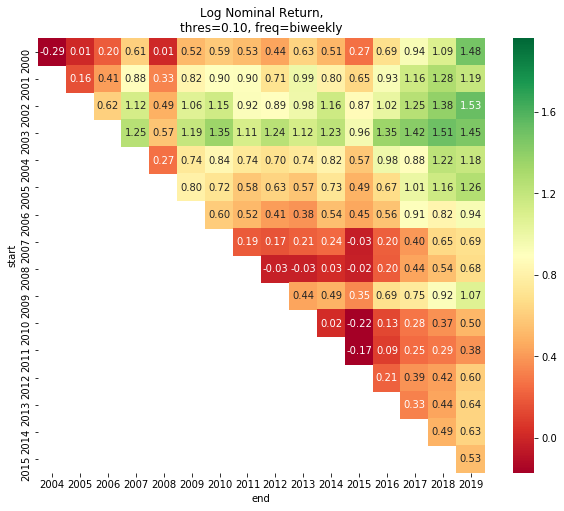

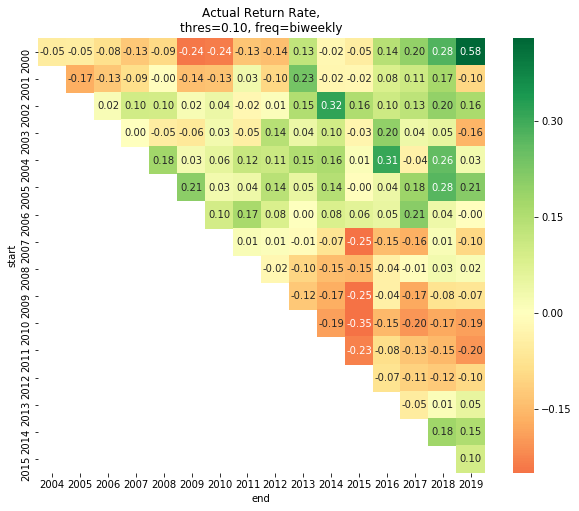

In [24]:
thres="0.10"
freq="biweekly"
nom_vmax = 1.9620901330428744 
nom_vmin = -0.17182904358626236
act_vmax = 0.43
act_vmin = -0.25
plotHeatMap(thres, freq, nom_vmax=nom_vmax, nom_vmin=nom_vmin, act_vmax=act_vmax, act_vmin=act_vmin)

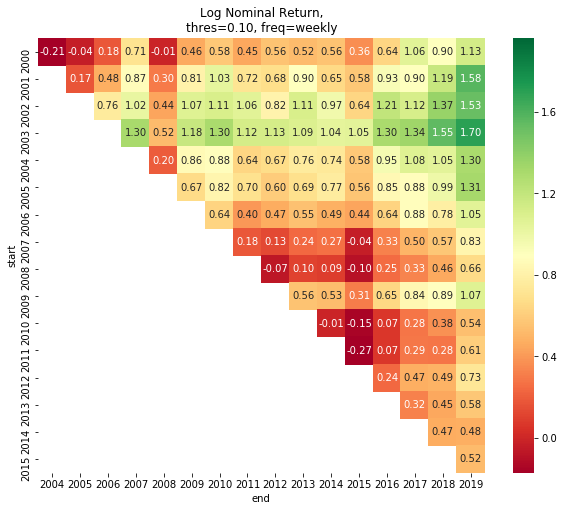

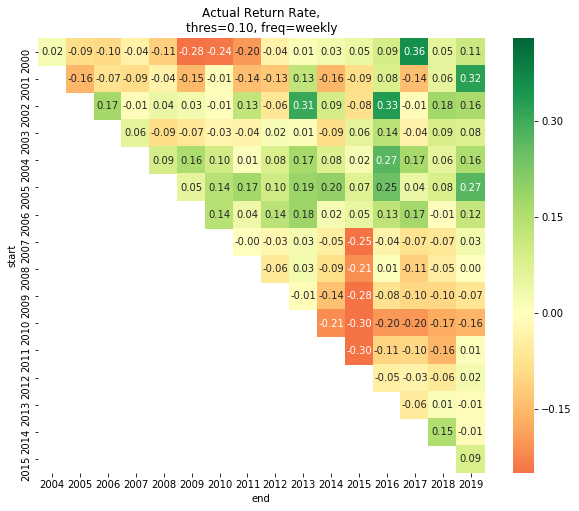

In [25]:
thres="0.10"
freq="weekly"
nom_vmax = 1.9620901330428744 
nom_vmin = -0.17182904358626236
act_vmax = 0.43
act_vmin = -0.25
plotHeatMap(thres, freq, nom_vmax=nom_vmax, nom_vmin=nom_vmin, act_vmax=act_vmax, act_vmin=act_vmin)

In [31]:
# final_result_dict = {}
# for thres in dir_dict:
#     for freq in freq_list:
thres="0.20"
freq="monthly"
DIR = path.join("/Volumes/Seagate Backup Plus Drive/FYP/", dir_dict[thres], freq)
if os.path.exists(DIR):
    actual_profit_result = {}
    nominal_profit_result = {}
    for start in range(2000, 2016):
        for end in range(start+4, 2020):
            file_prefix = "0418-TEST_"+thres+"_"+freq+"Crisis_"+str(start)+"_"+str(end)+"--detailed-ModelNo_200000-"
            actual_profit_list = []
            nominal_profit_list = []
            for i in range(10):
                record = pickle.load(open(path.join(DIR,file_prefix+str(i)+".out"), "rb"))
                df = pd.DataFrame(record)
                actual_profit_rate = df['actual_profit'].iloc[-1]/df['buyNhold_balance'].iloc[-1]
                nominal_profit_rate = (df['net_worth'].iloc[-1]-300000)/300000
                actual_profit_list.append(actual_profit_rate)
                nominal_profit_list.append(nominal_profit_rate)

            actual_profit_result[(start,end)] = np.mean(actual_profit_list)
            nominal_profit_result[(start,end)] = np.mean(nominal_profit_list)
        print(thres, freq, start)
            
            

0.20 monthly 2000
0.20 monthly 2001
0.20 monthly 2002
0.20 monthly 2003
0.20 monthly 2004
0.20 monthly 2005
0.20 monthly 2006
0.20 monthly 2007
0.20 monthly 2008
0.20 monthly 2009
0.20 monthly 2010
0.20 monthly 2011
0.20 monthly 2012
0.20 monthly 2013
0.20 monthly 2014
0.20 monthly 2015


In [32]:
df_dict = []
for key in actual_profit_result:
    start = key[0]
    end = key[1]
    df_dict.append({
        "start": start,
        "end":end,
        "actual_profit": actual_profit_result[key],
        "nominal_profit": nominal_profit_result[key],
        "log_actual_profit": np.log(actual_profit_result[key]+1),
        "log_nominal_profit": np.log(nominal_profit_result[key]+1),
    })

In [33]:
model_df = pd.DataFrame(df_dict)

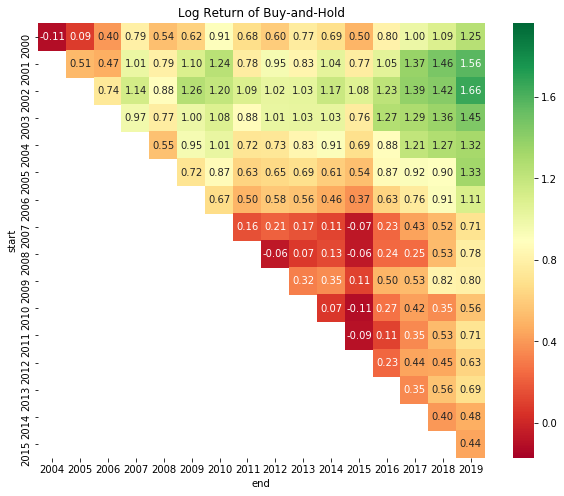

In [39]:
vmax = 1.9620901330428744 
vmin = -0.17182904358626236
import seaborn as sns
plt.figure(figsize=(10,8))
plt.title("Log Nominal Return")
sns.heatmap(model_df.pivot(index="start", columns="end", values="log_nominal_profit"), 
            annot=True, fmt=".2f", cmap="RdYlGn", vmax=vmax, vmin=vmin)

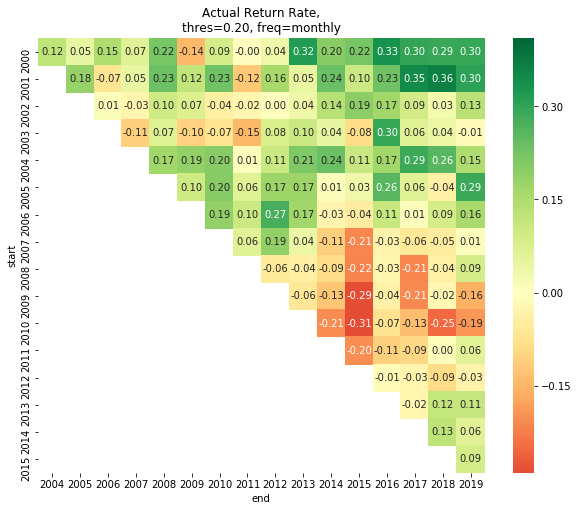

In [46]:
plt.figure(figsize=(10,8))
plt.title("Actual Return Rate,\nthres="+thres+", freq="+freq)
sns.heatmap(model_df.pivot(index="start", columns="end", values="actual_profit"), 
            annot=True, fmt=".2f", cmap="RdYlGn", center=0, vmax = 0.41, vmin=-0.29)